In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('./BalancedDataset/underSampledBalance.csv')

In [3]:
# 1. Basic Information
print("===== Dataset Information =====")
print(df.info())  # Data types and non-null counts


===== Dataset Information =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      165 non-null    int64  
 1   Source IP                    165 non-null    int64  
 2   Source Port                  165 non-null    int64  
 3   Destination IP               165 non-null    int64  
 4   Destination Port             165 non-null    int64  
 5   Protocol                     165 non-null    int64  
 6   Timestamp                    165 non-null    int64  
 7   Flow Duration                165 non-null    int64  
 8   Total Fwd Packets            165 non-null    int64  
 9   Total Backward Packets       165 non-null    int64  
 10  Total Length of Fwd Packets  165 non-null    float64
 11  Total Length of Bwd Packets  165 non-null    float64
 12  Fwd Packet Length Max        165 non-null    f

In [4]:
print("\n===== First 5 Rows =====")
print(df.head())  # Display first 5 rows


===== First 5 Rows =====
   Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
0    99119       1592         8080            1598              4857   
1     3700        845        36200            1601                80   
2   177145       1546        54119            2293               444   
3    23259       1541        48056            2610                80   
4     3931        845        41948            1601                80   

   Protocol  Timestamp  Flow Duration  Total Fwd Packets  \
0         6         56             79                  1   
1         6         40             43                  1   
2         6         94      119992821               2252   
3         6         44       83508399                  8   
4         6        230        5076689                  3   

   Total Backward Packets  ...  Active Mean  Active Std  Active Max  \
0                       1  ...          0.0         0.0         0.0   
1                       1  ...        

In [5]:
print("\n===== Last 5 Rows =====")
print(df.tail())  # Display last 5 rows



===== Last 5 Rows =====
     Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
160    19558       1541        40654            2610                80   
161     4843        845        54660            1601                80   
162    12858       1495        53732            2560                21   
163     3824        845        39174            1601                80   
164     5014        845        56576            1601                80   

     Protocol  Timestamp  Flow Duration  Total Fwd Packets  \
160         6         77       10509057                  8   
161         6         20        5500437                  3   
162         6        459        9709279                  9   
163         6        227        6000338                  3   
164         6         23        5297427                  3   

     Total Backward Packets  ...  Active Mean  Active Std  Active Max  \
160                       4  ...        969.0         0.0       969.0   
161        

In [6]:
print("\n===== Dataset Shape =====")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")  # Dataset dimensions


===== Dataset Shape =====
Rows: 165, Columns: 85


In [7]:
# 2. Handle Missing Values
print("\n===== Missing Values =====")
print(df.isnull().sum().to_string())  # Count of missing values in each column


===== Missing Values =====
Flow ID                        0
Source IP                      0
Source Port                    0
Destination IP                 0
Destination Port               0
Protocol                       0
Timestamp                      0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max    

In [8]:

# Fill missing values (if necessary)
# df.fillna(method='ffill', inplace=True)  # Forward fill
# df.fillna(method='bfill', inplace=True)  # Backward fill
# df.fillna(df.mean(), inplace=True)  # Fill with mean (for numerical columns)


In [9]:

# 3. Statistical Summary
print("\n===== Statistical Summary =====")
print(df.describe())  # Summary statistics for numerical columns



===== Statistical Summary =====
             Flow ID    Source IP   Source Port  Destination IP  \
count     165.000000   165.000000    165.000000      165.000000   
mean    39508.418182  1290.206061  43053.103030     2088.696970   
std     47735.505019   487.416616  16041.590834      595.135386   
min      2838.000000   426.000000     80.000000      537.000000   
25%     11341.000000   845.000000  36208.000000     1601.000000   
50%     22482.000000  1495.000000  46468.000000     2293.000000   
75%     38007.000000  1541.000000  54119.000000     2610.000000   
max    177148.000000  4109.000000  65139.000000     3492.000000   

       Destination Port    Protocol   Timestamp  Flow Duration  \
count        165.000000  165.000000  165.000000   1.650000e+02   
mean        3036.187879    6.266667  146.987879   3.033409e+07   
std        10628.406133    1.696960  144.101505   4.325185e+07   
min           21.000000    6.000000    0.000000   0.000000e+00   
25%           80.000000    6.0000

In [10]:
print("\n===== Categorical Summary =====")
print(df.describe(include=['object']))  # Summary for categorical columns


===== Categorical Summary =====
       Label
count    165
unique    15
top      Bot
freq      11


In [11]:

# 4. Unique Values in Categorical Columns
print("\n===== Unique Values in Categorical Columns =====")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


===== Unique Values in Categorical Columns =====
Label: 15 unique values



===== Distribution of Numerical Features =====


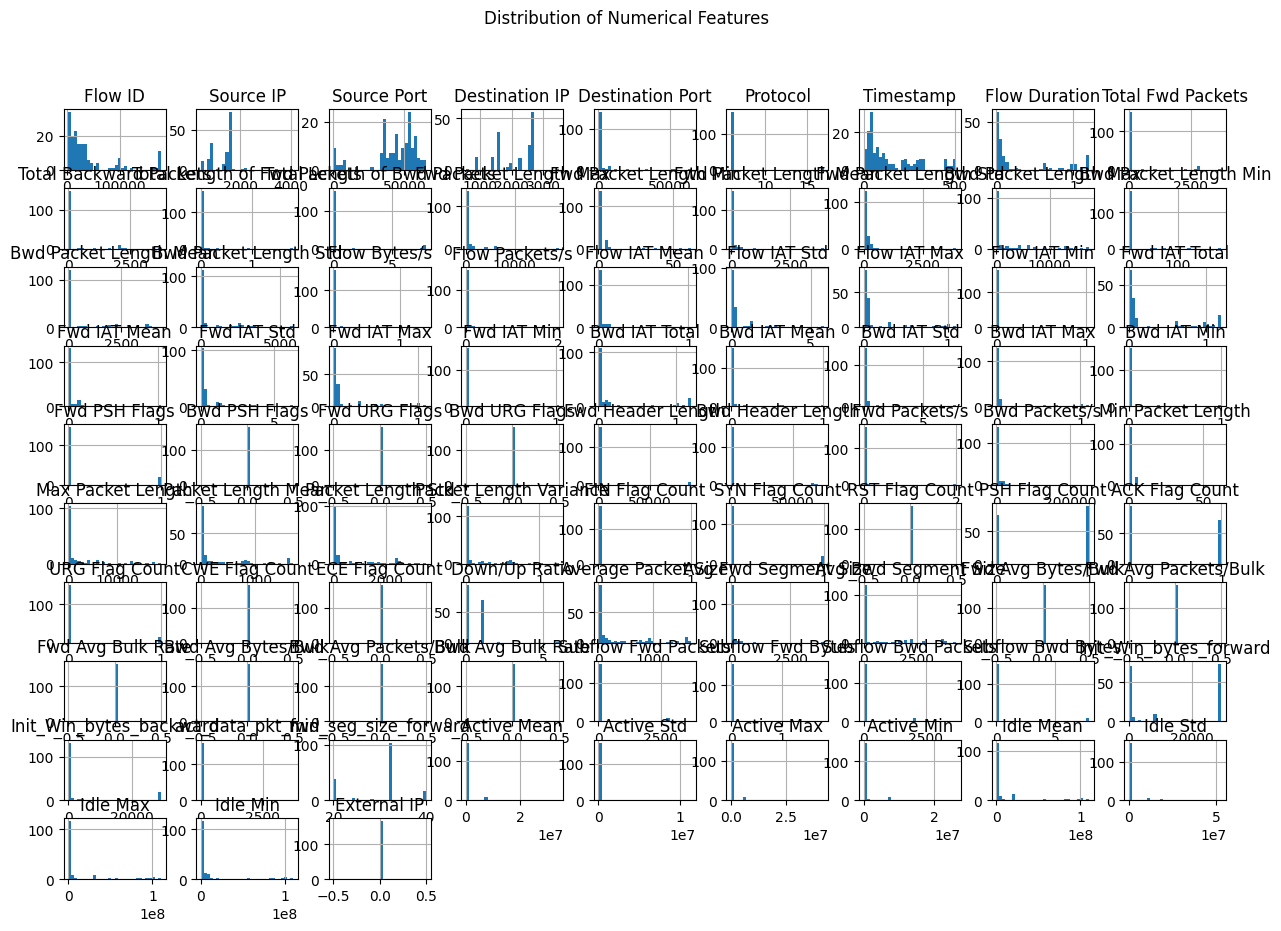

In [12]:
# 5. Distribution of Numerical Features
print("\n===== Distribution of Numerical Features =====")
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()



===== Distribution of Categorical Features =====


C:\Users\Pratham\AppData\Local\Temp\ipykernel_34116\1376831365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


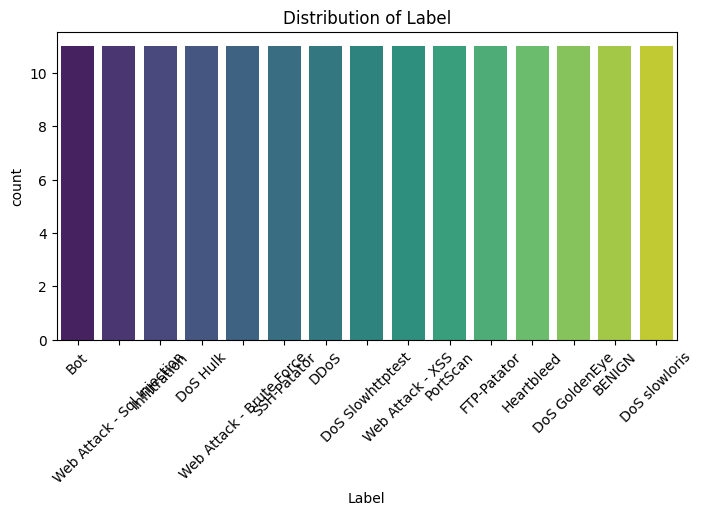

In [13]:

# 6. Distribution of Categorical Features
print("\n===== Distribution of Categorical Features =====")
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()




===== Outlier Detection (Boxplots) =====


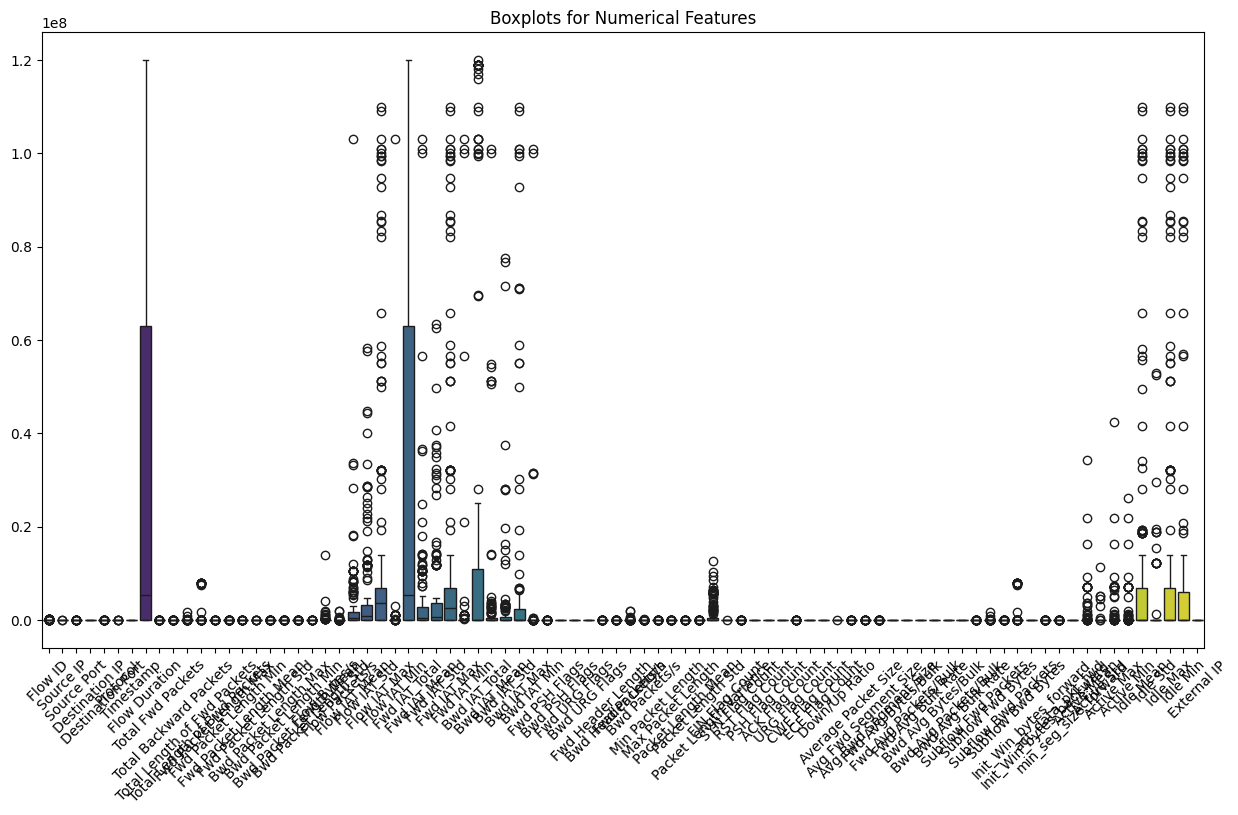

In [14]:
# 7. Outlier Detection (Boxplots)
print("\n===== Outlier Detection (Boxplots) =====")
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), palette='viridis')
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [15]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # Load the dataset
# df = pd.read_csv('./BalancedDataset/underSampledBalance.csv')

# # Check the unique values in the target column before encoding
# print("Unique values in the target column before encoding:")
# print(df['Label'].unique())

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Apply Label Encoding to the target column
# df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

# # Check the unique values in the target column after encoding
# print("\nUnique values in the target column after encoding:")
# print(df['Label_Encoded'].unique())

# # Display the mapping of original labels to encoded values
# print("\nLabel Encoding Mapping:")
# for i, label in enumerate(label_encoder.classes_):
#     print(f"{label} -> {i}")

# # Save the updated dataset (optional)
# df.to_csv('./BalancedDataset/labelledUnderSampled.csv', index=False)
# print("\nDataset with label encoding saved as ./BalancedDataset/labelledUnderSampled'")

In [16]:
import seaborn as sns

# 9. Pairplot for Numerical Features
# print("\n===== Pairplot for Numerical Features =====")
# sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
# plt.suptitle("Pairplot for Numerical Features", y=1.02)
# plt.show()



===== Target Variable Analysis =====


C:\Users\Pratham\AppData\Local\Temp\ipykernel_34116\605327553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='viridis')


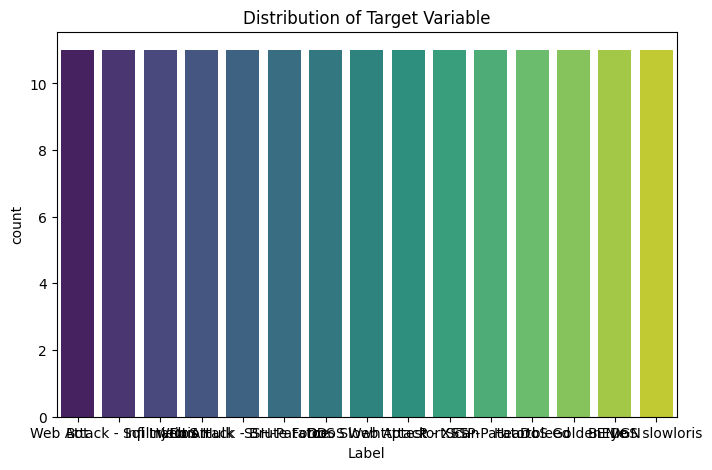

In [21]:
# 10. Target Variable Analysis (if applicable)
if 'Label' in df.columns:
    print("\n===== Target Variable Analysis =====")
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Label', palette='viridis')
    plt.title("Distribution of Target Variable")
    plt.show()




===== Feature Relationships with Target =====


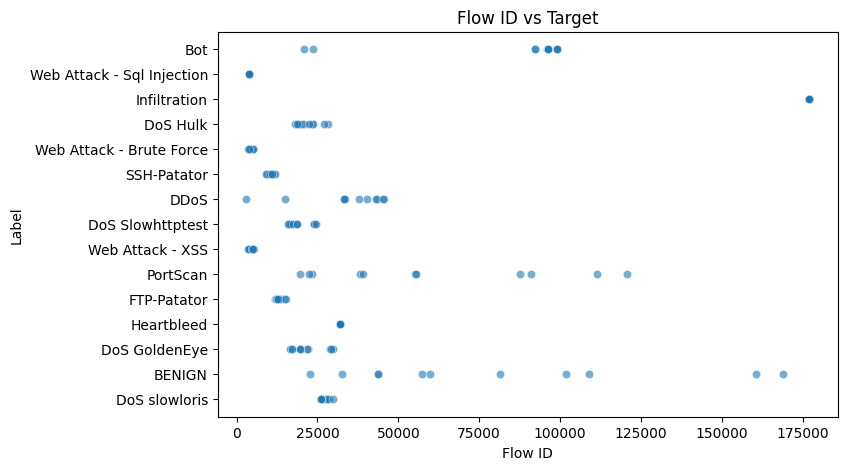

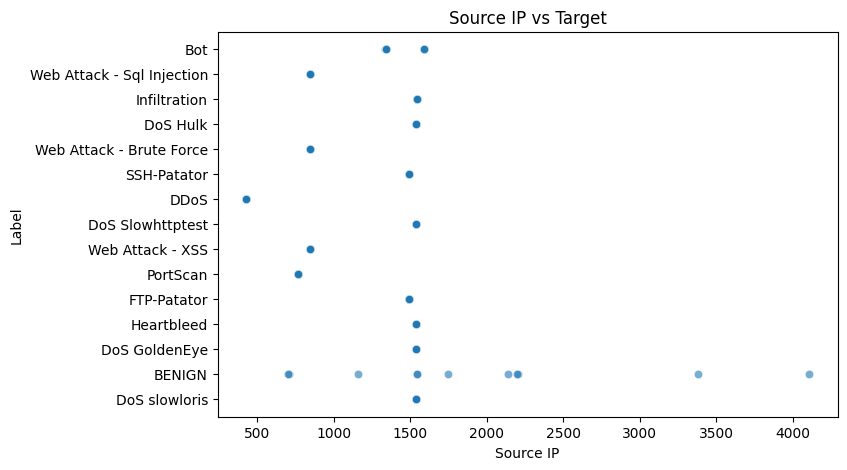

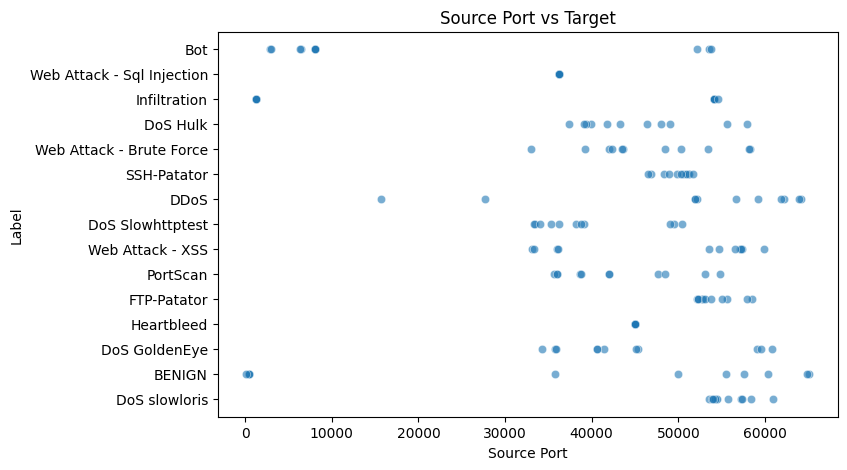

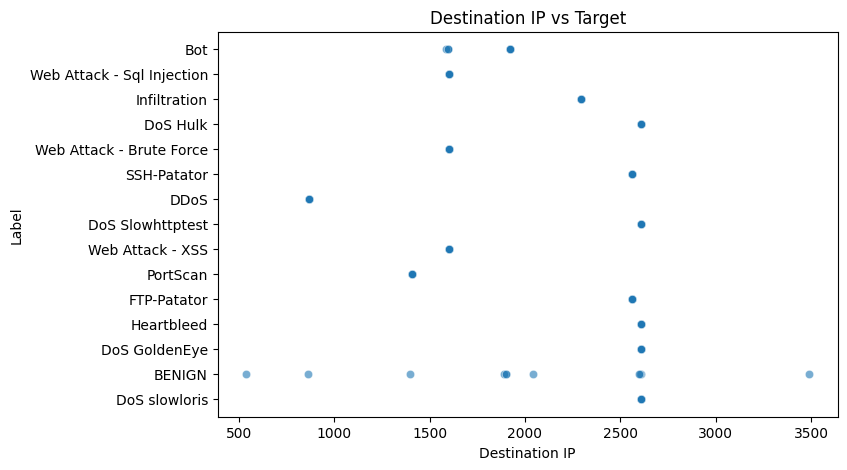

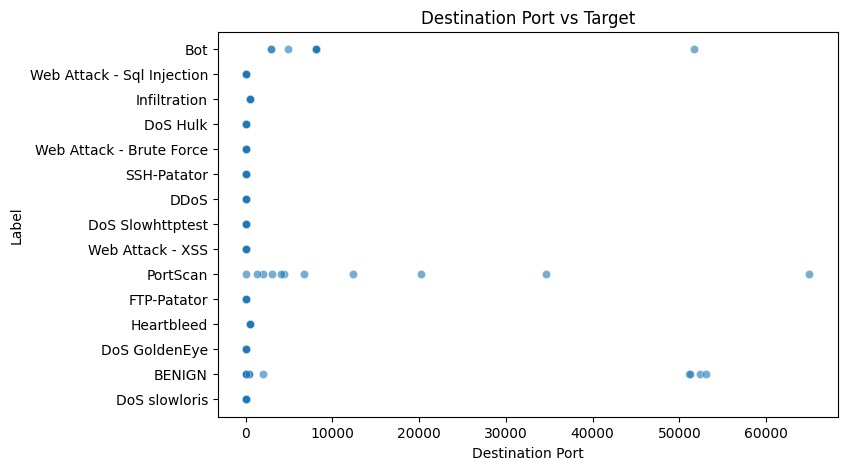

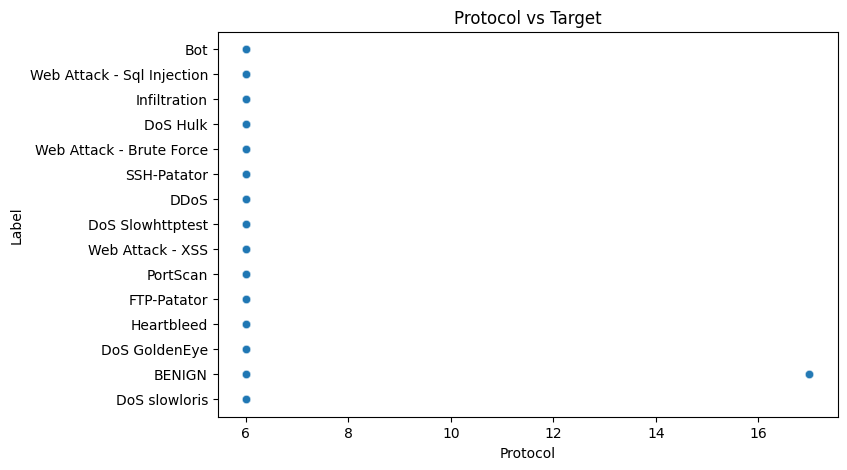

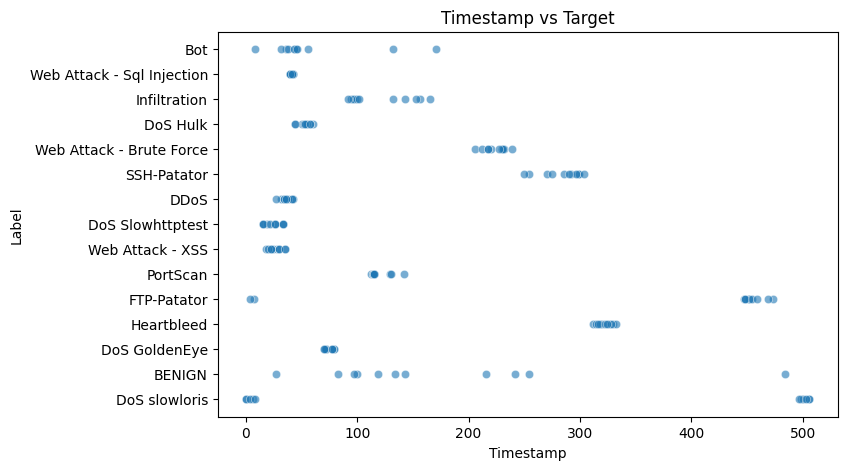

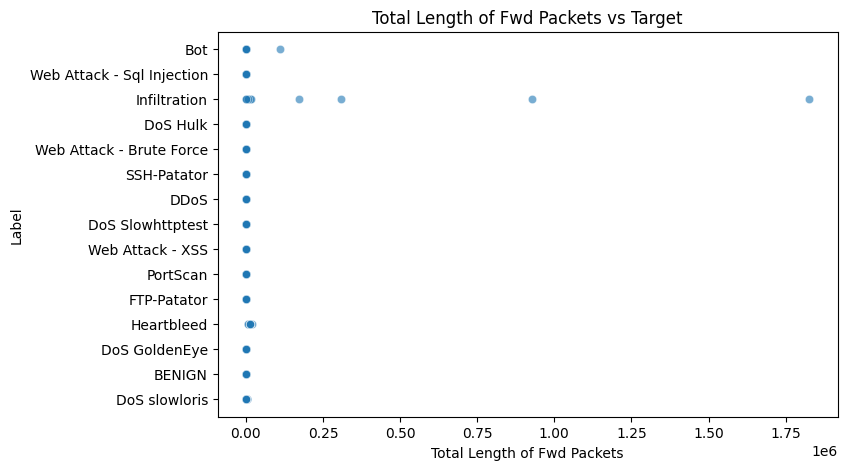

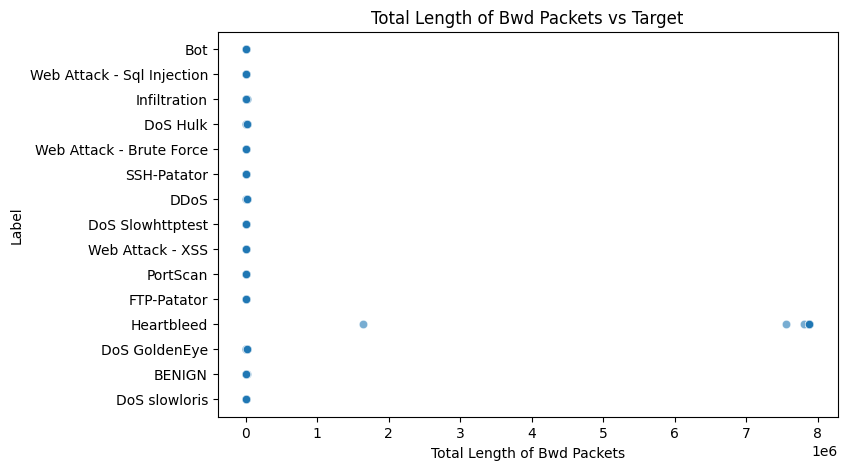

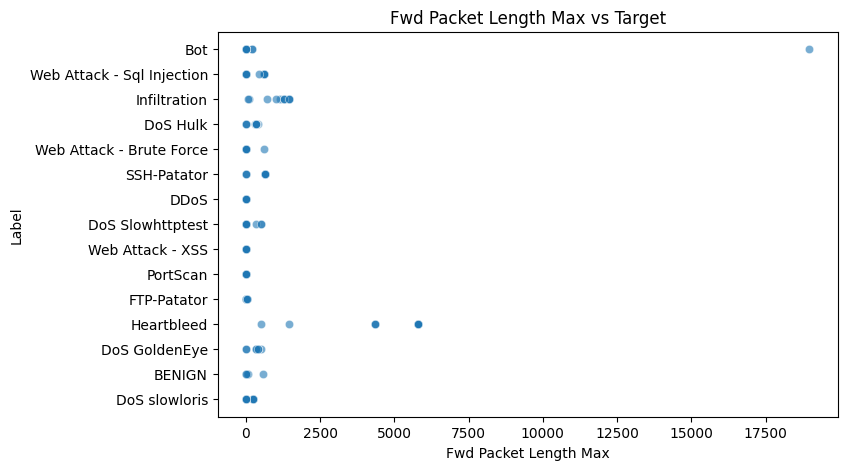

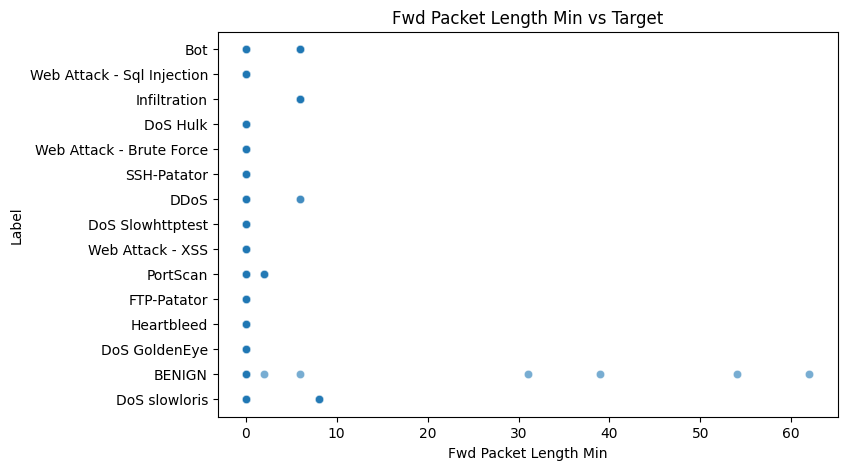

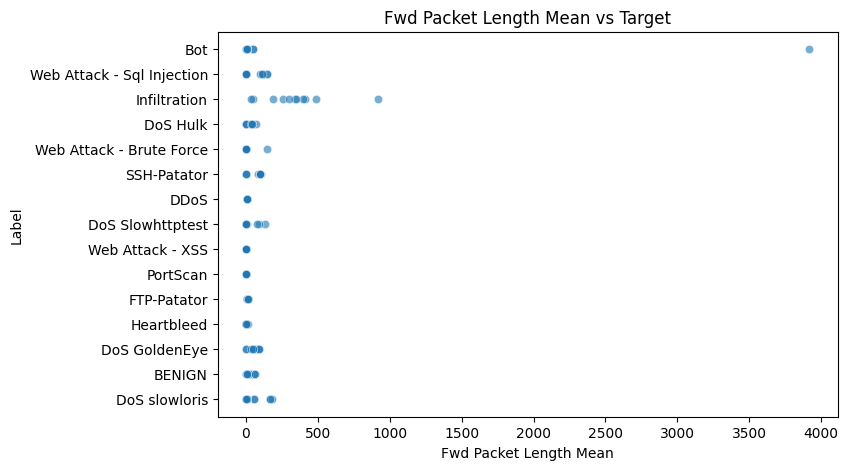

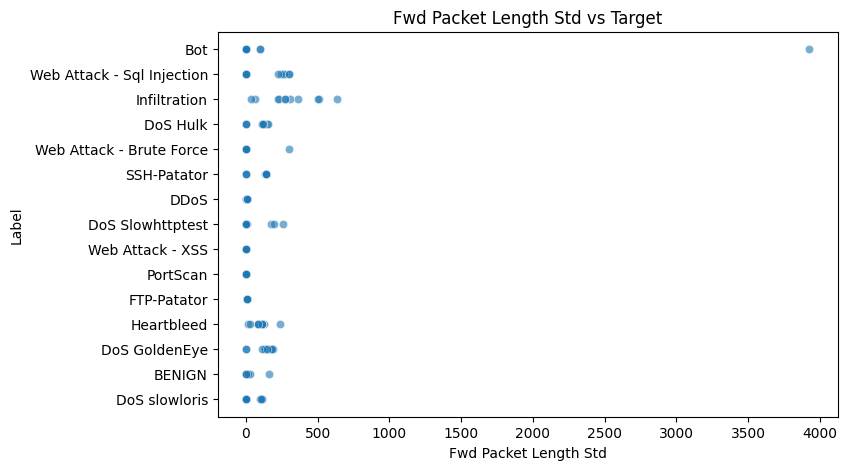

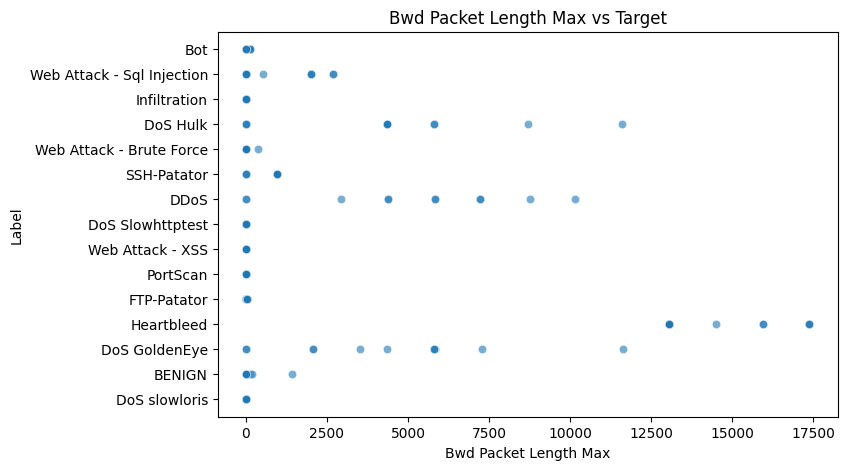

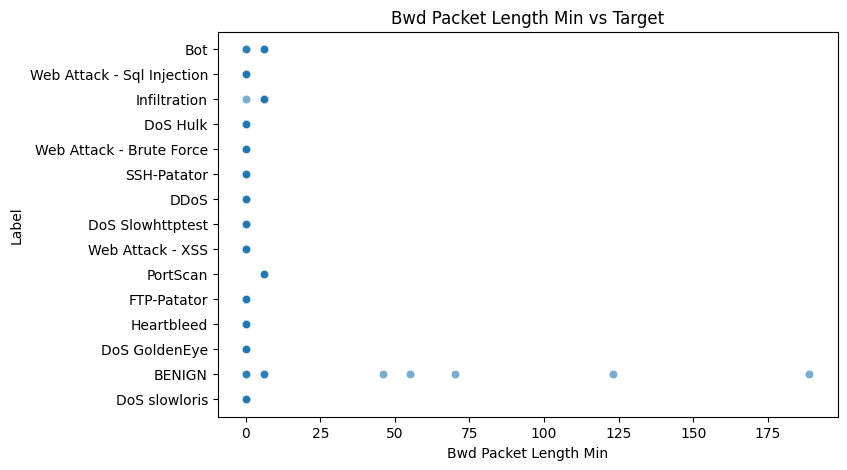

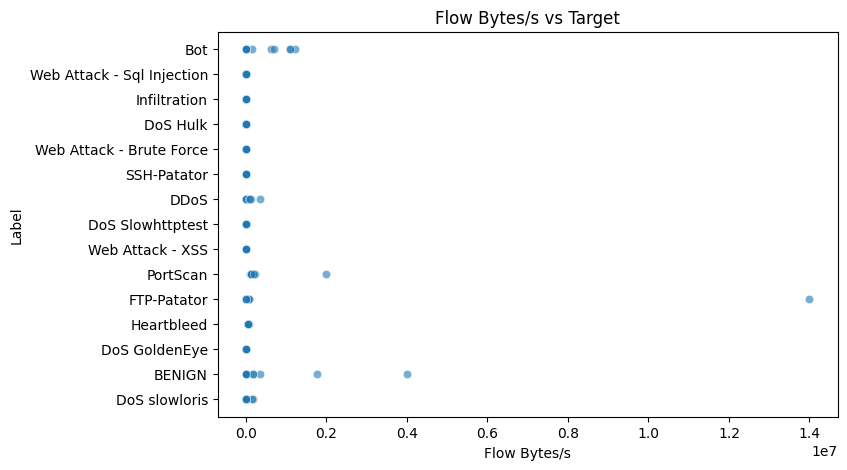

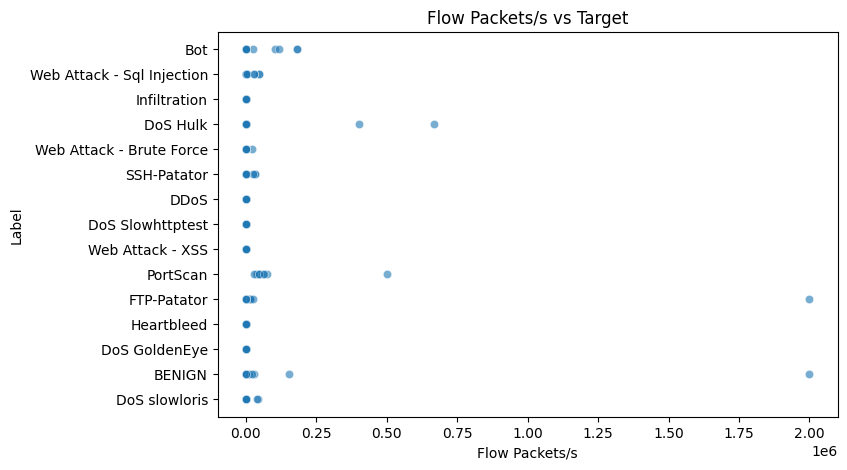

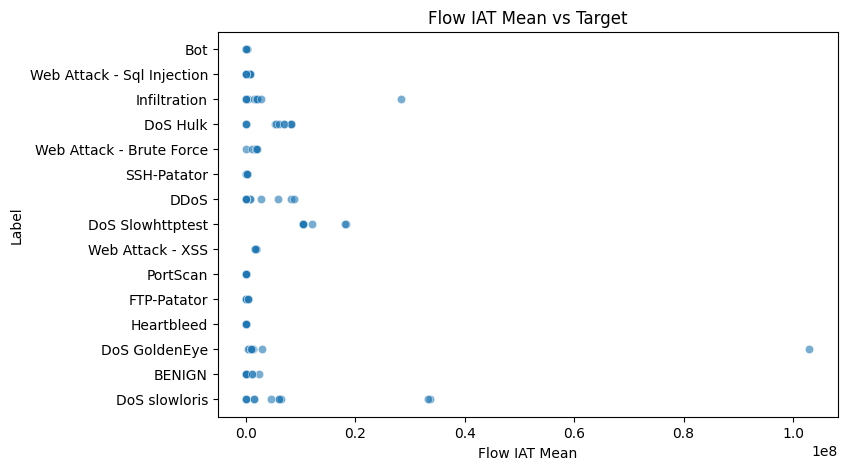

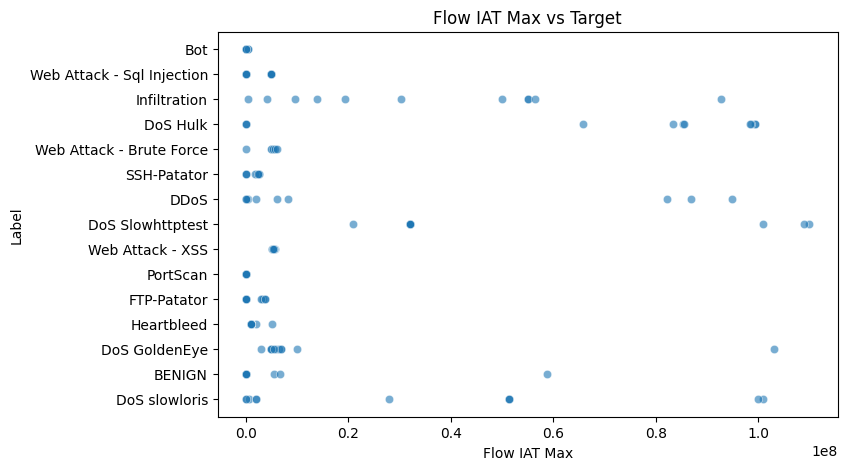

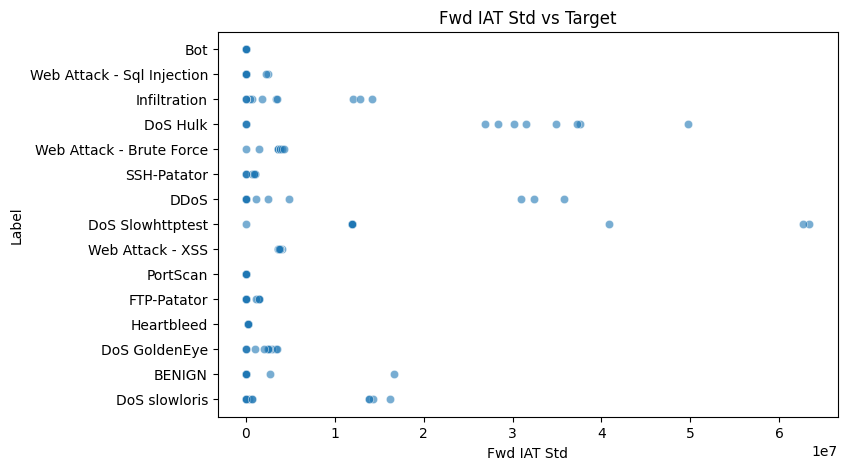

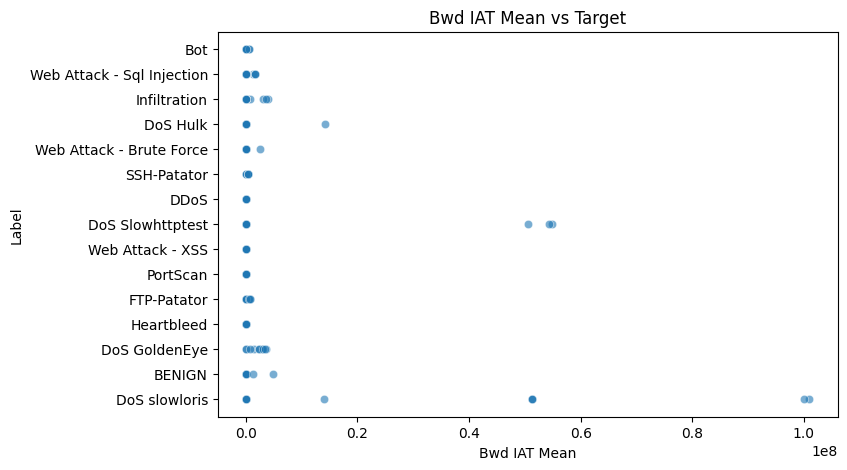

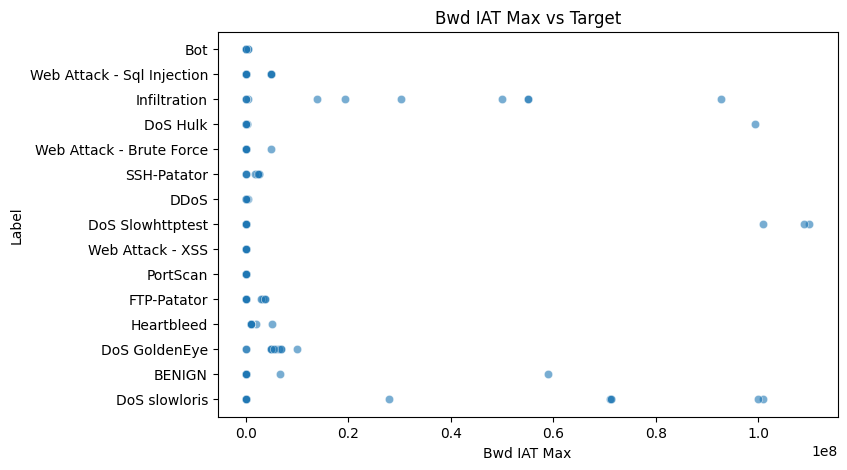

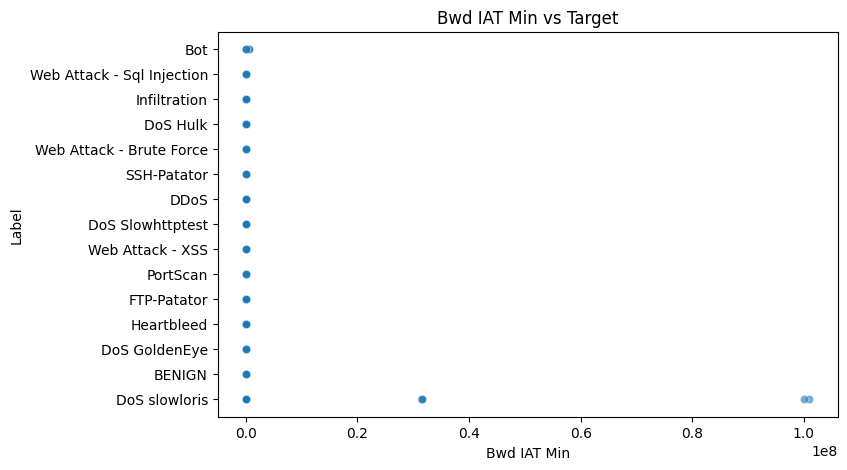

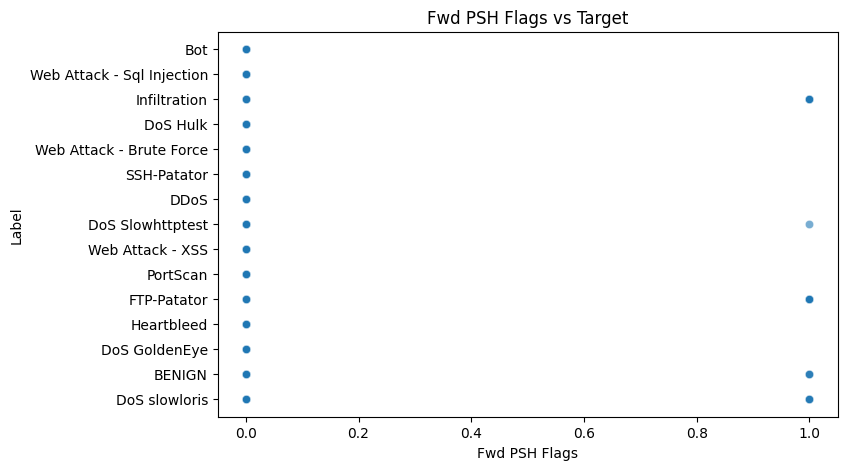

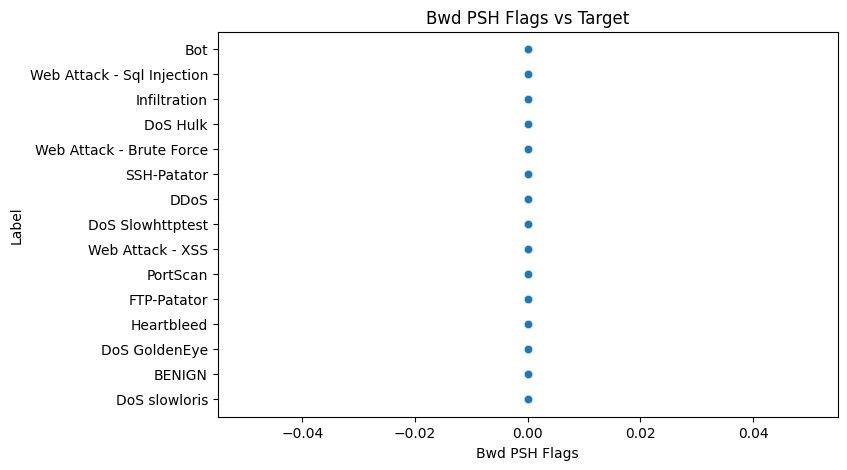

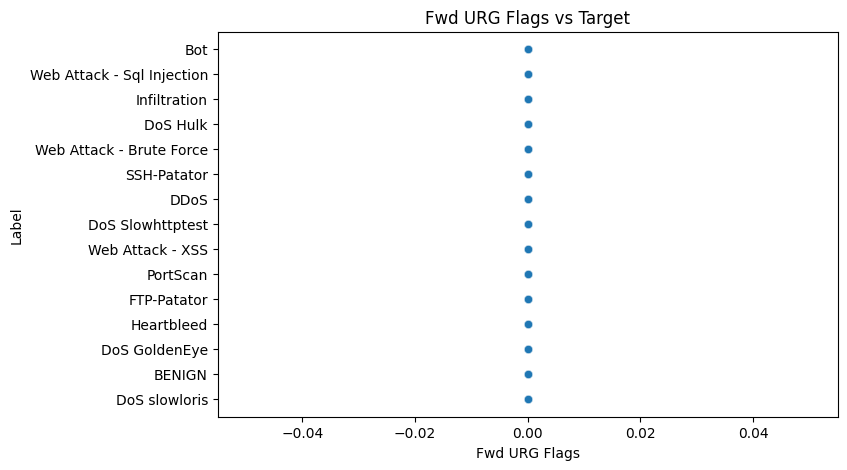

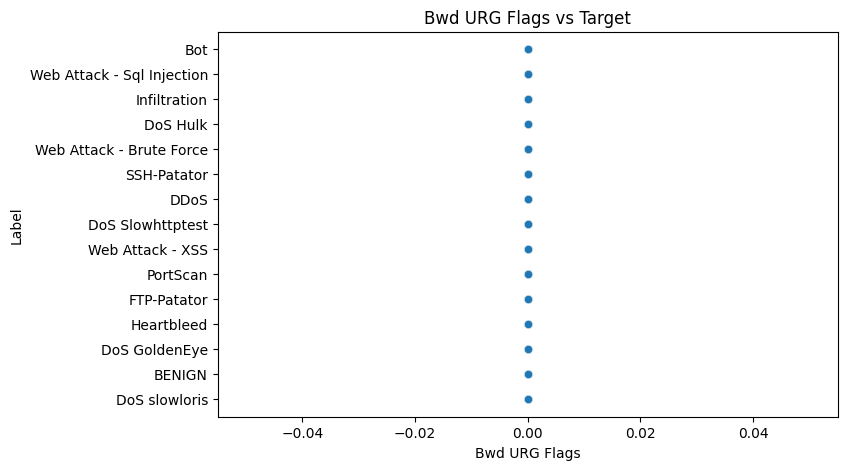

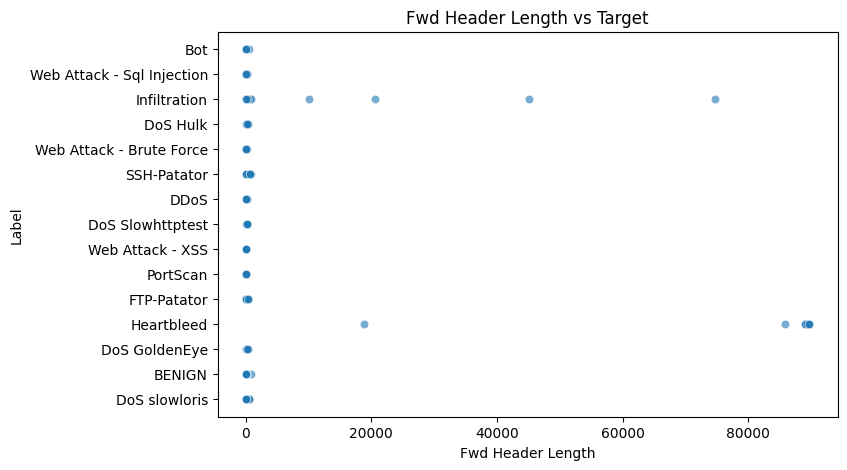

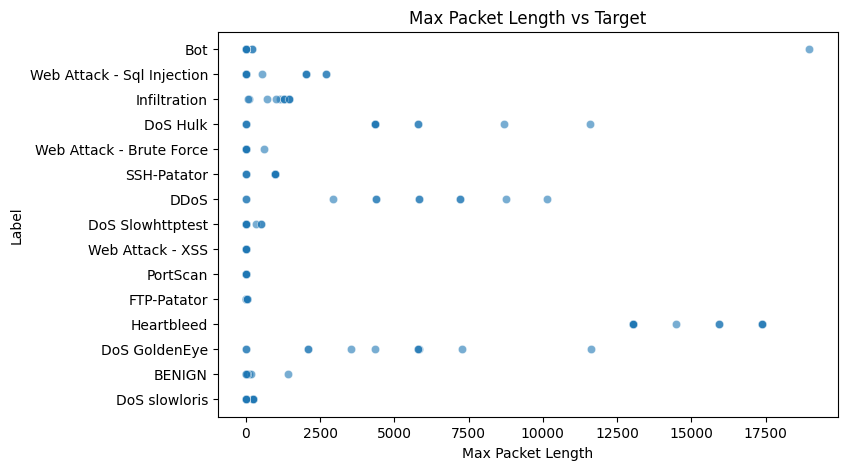

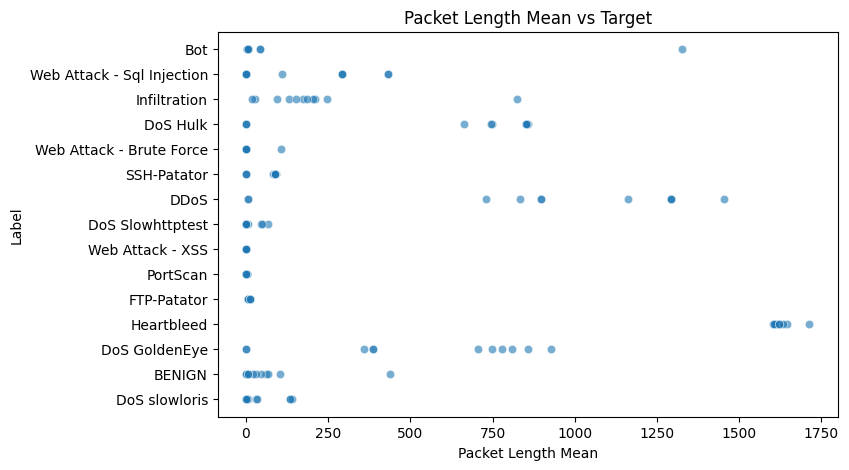

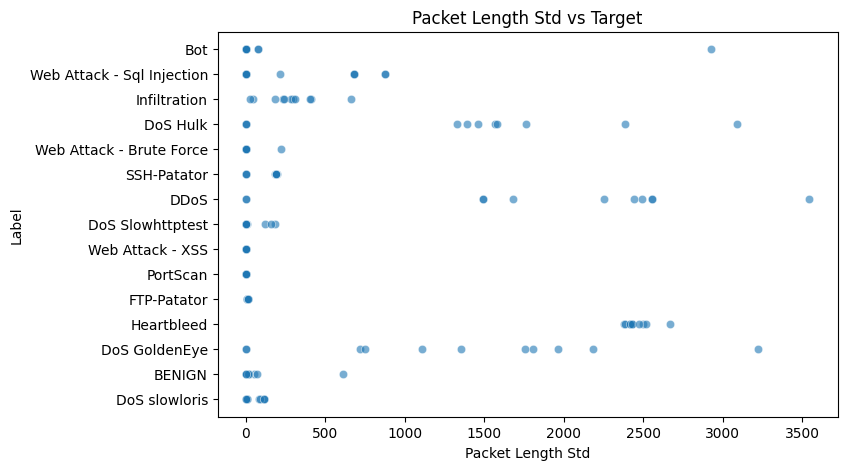

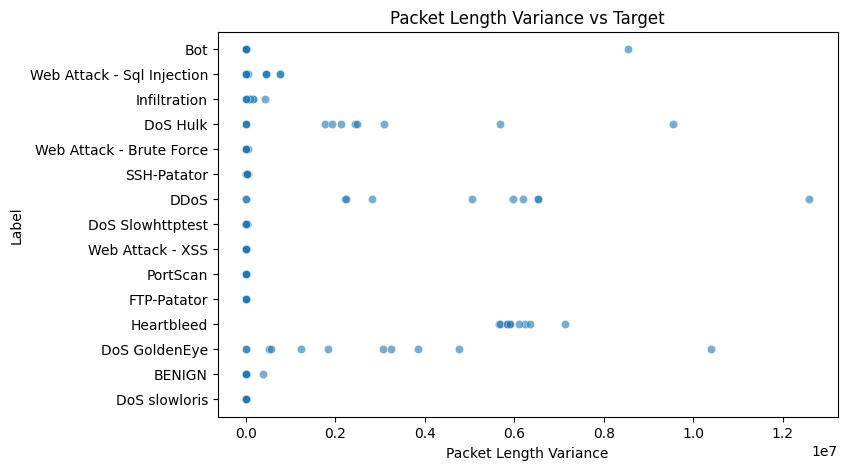

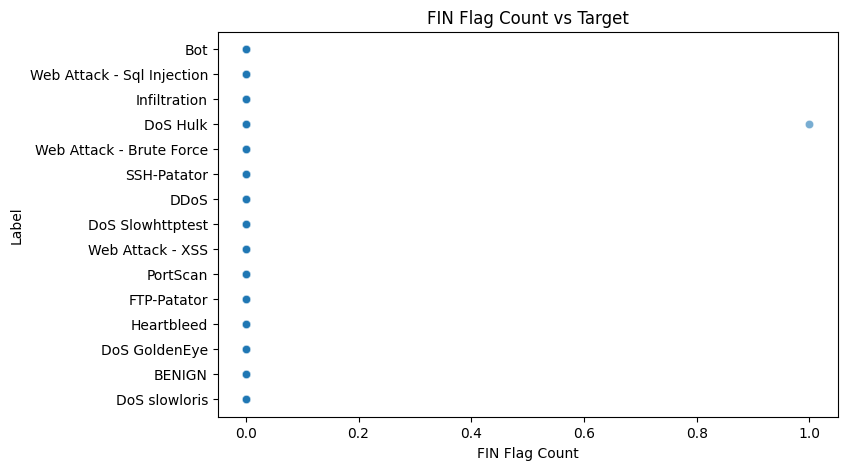

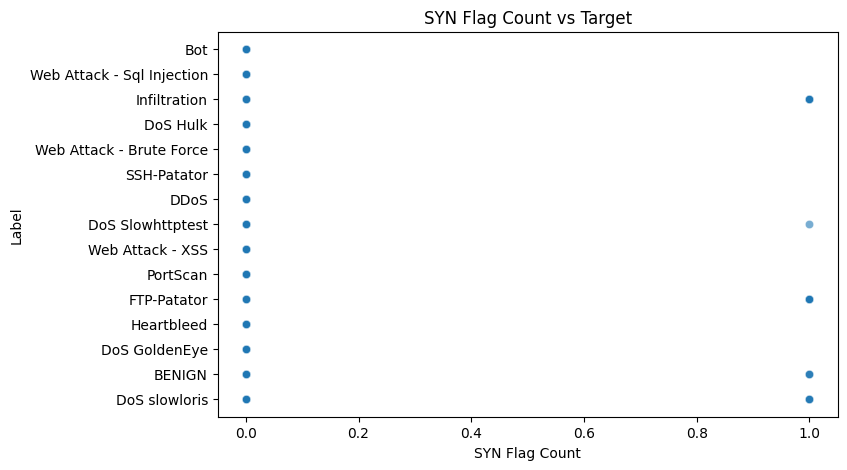

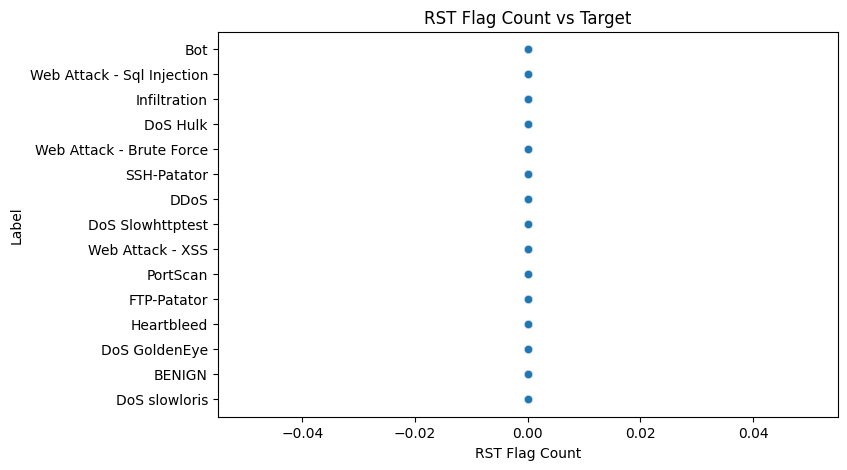

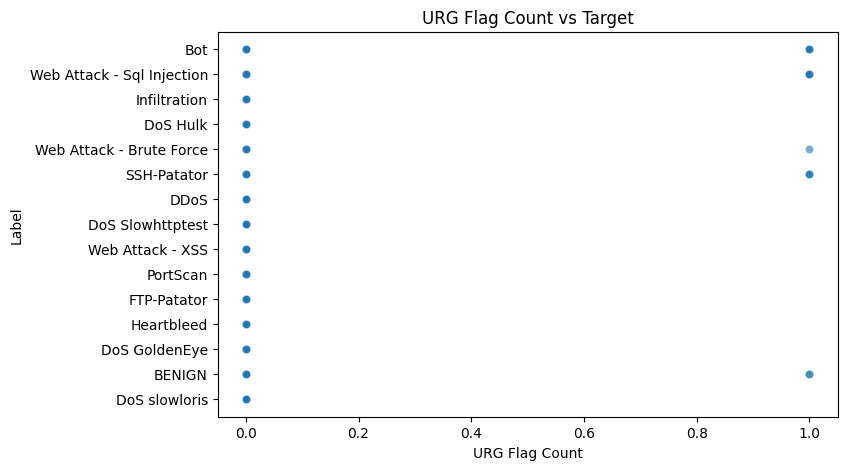

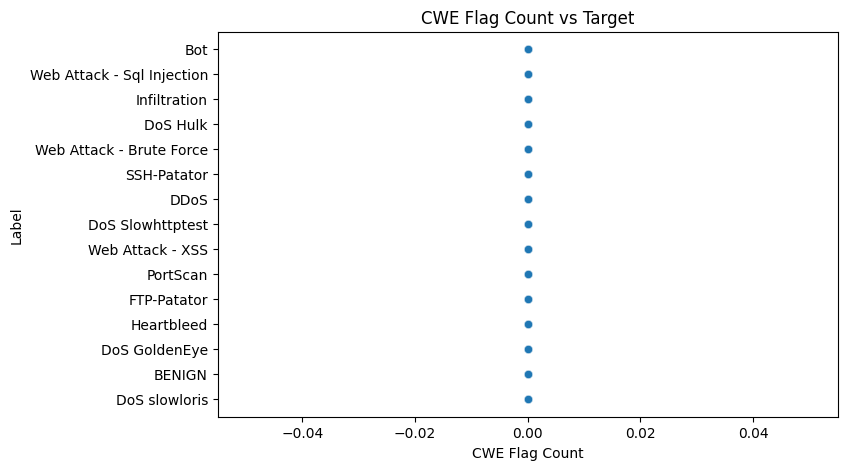

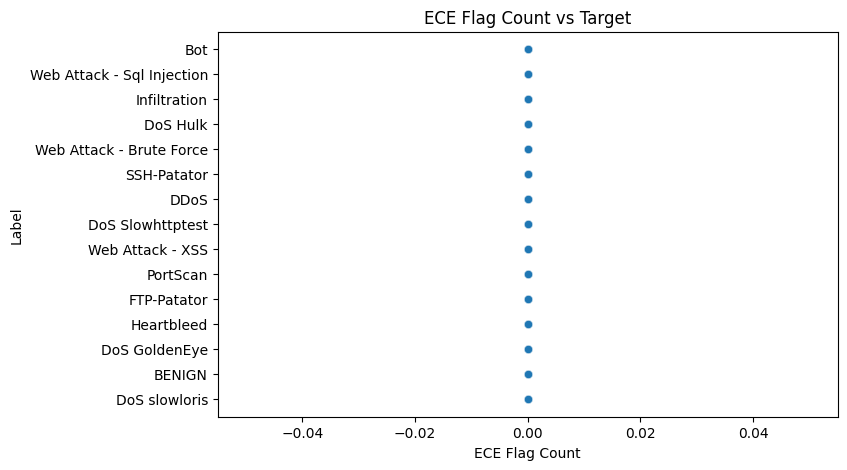

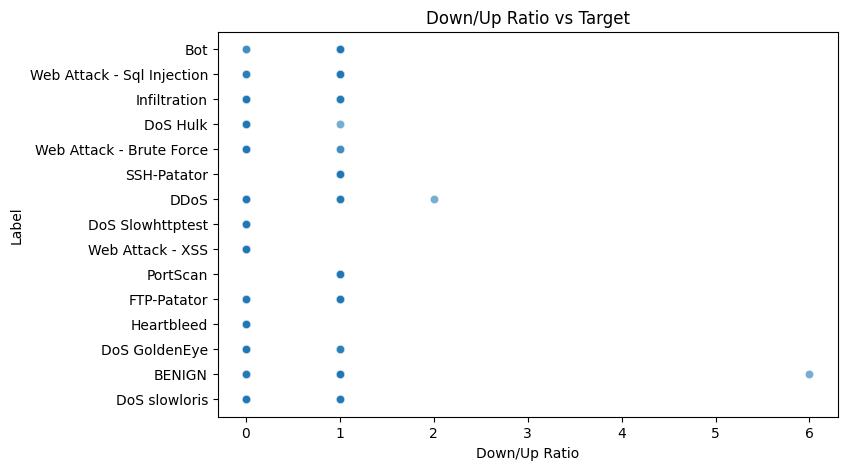

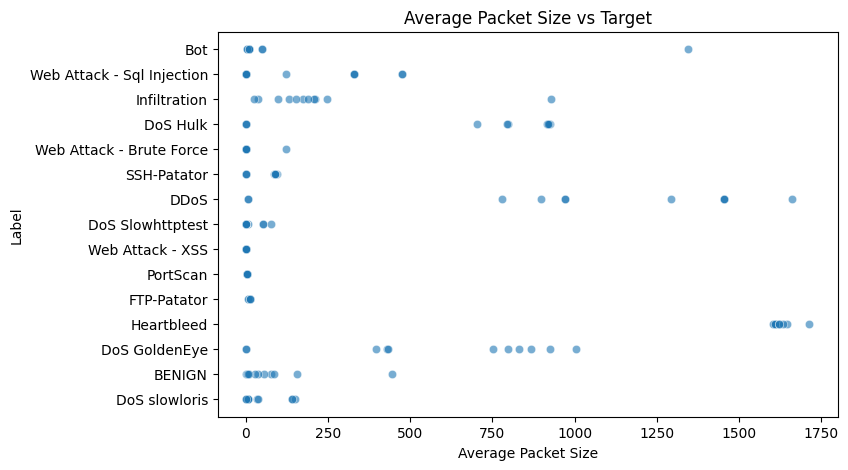

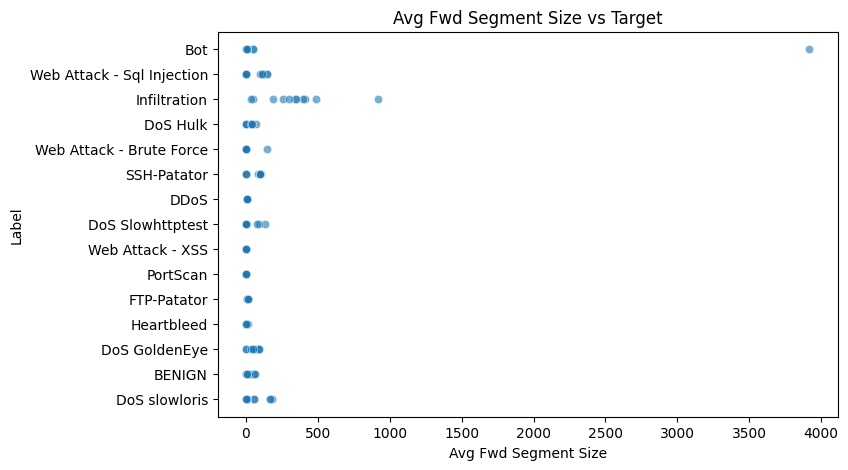

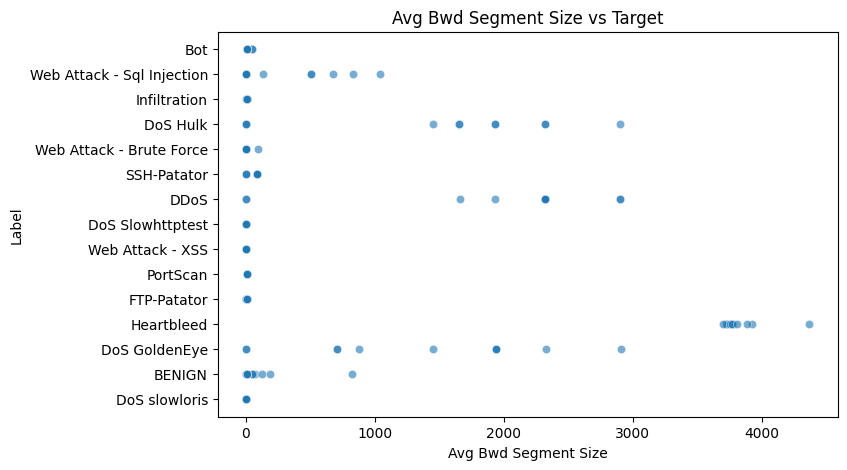

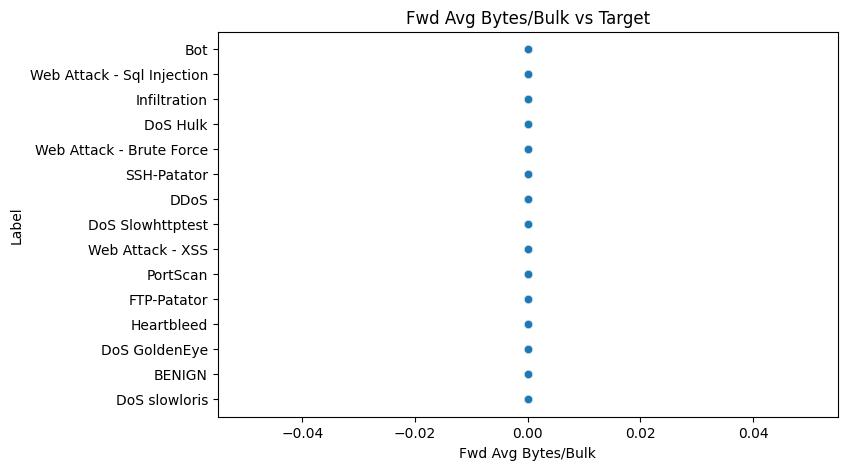

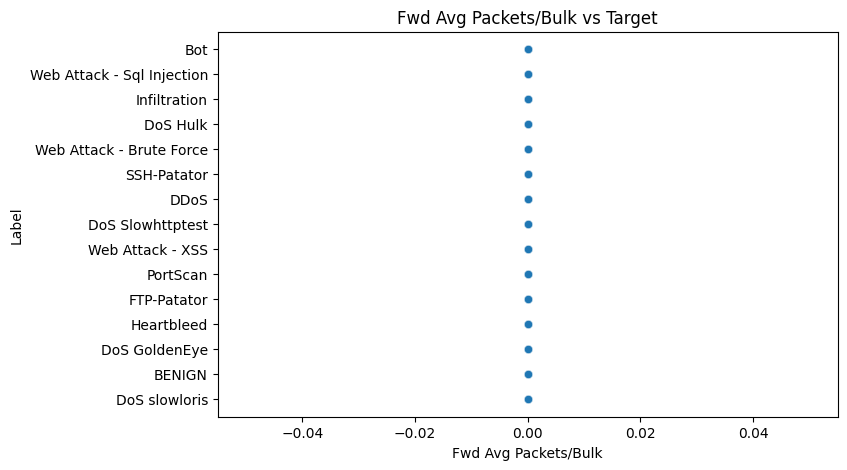

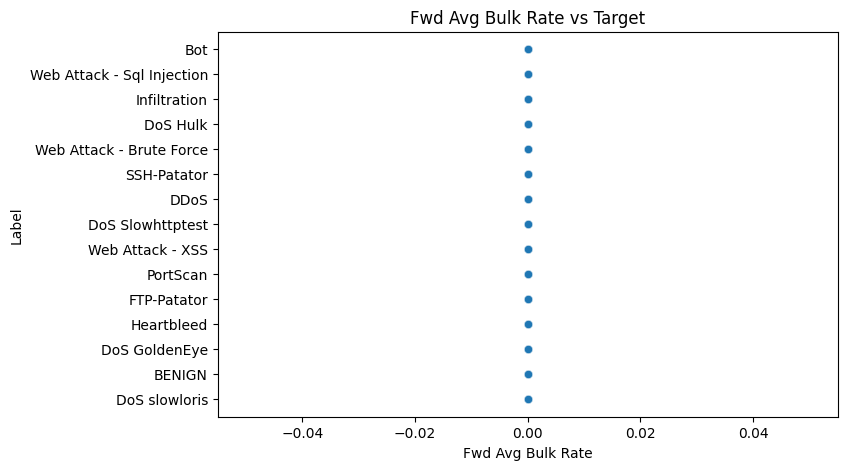

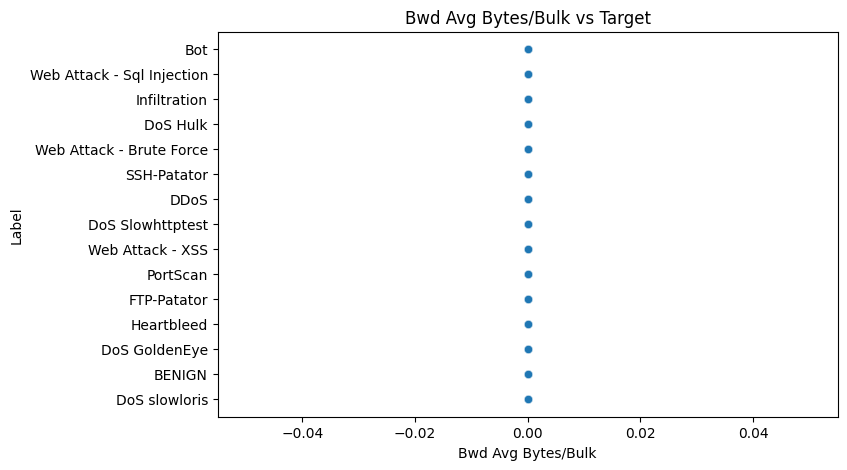

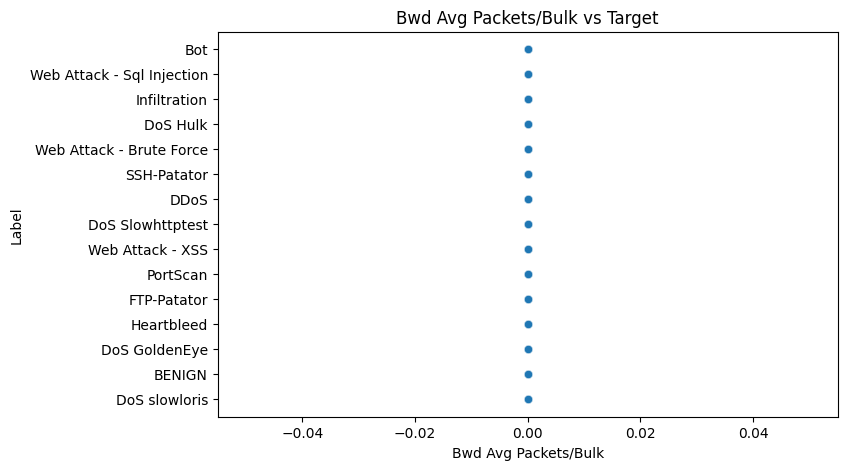

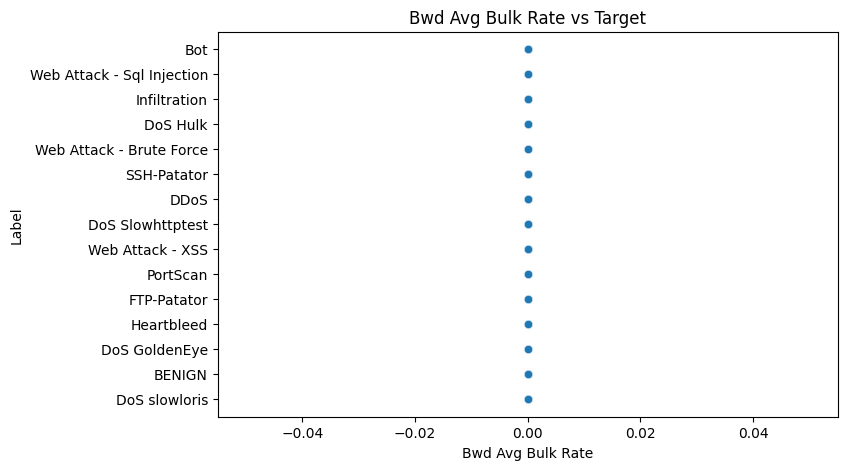

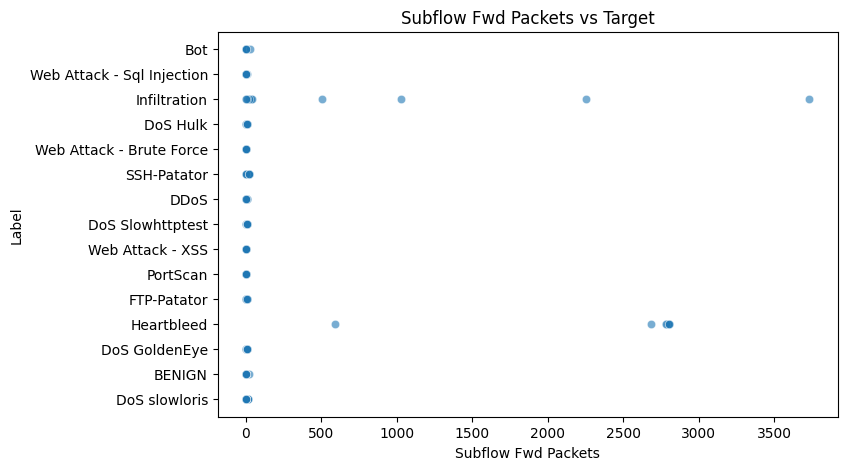

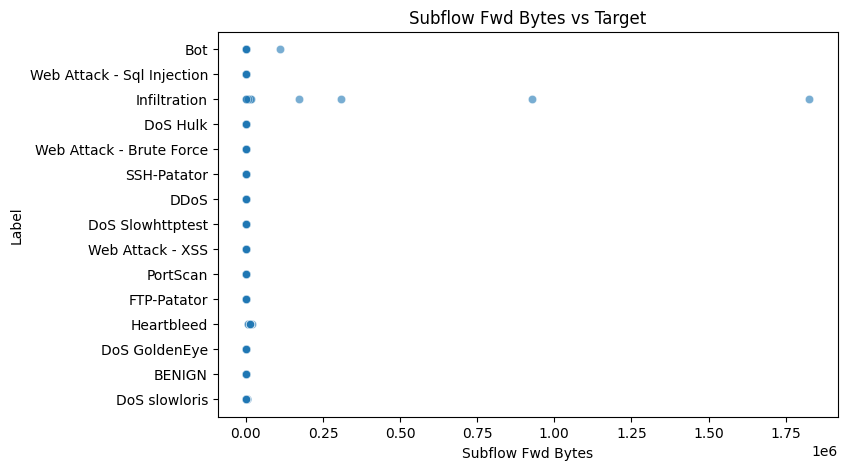

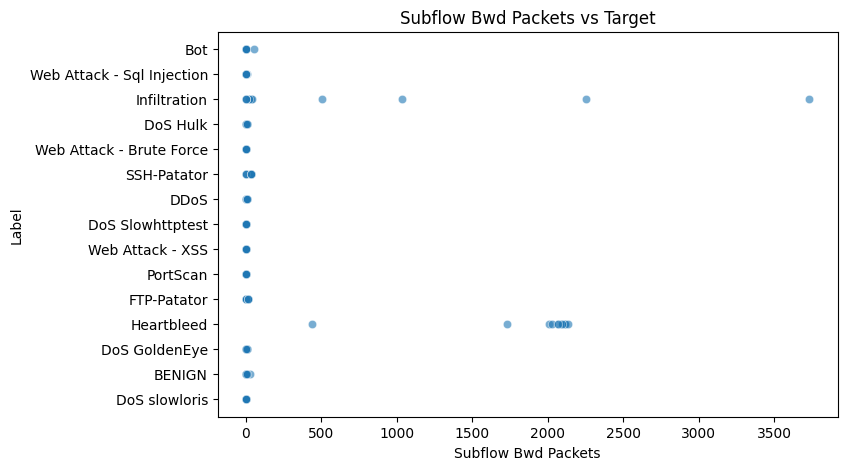

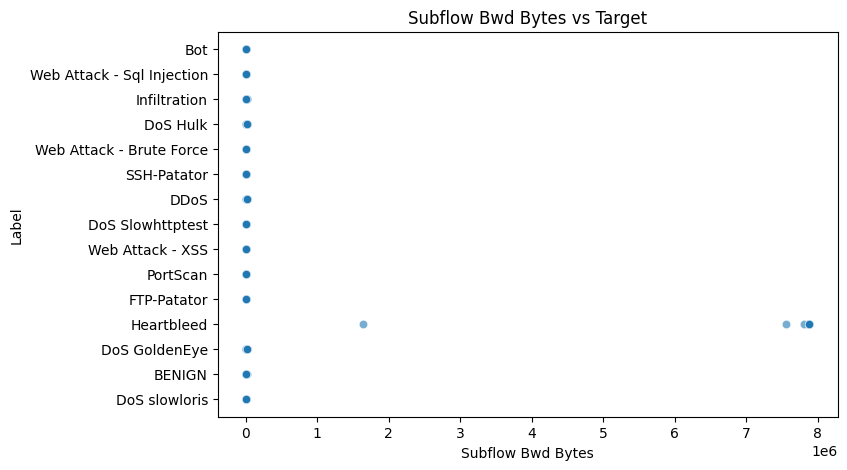

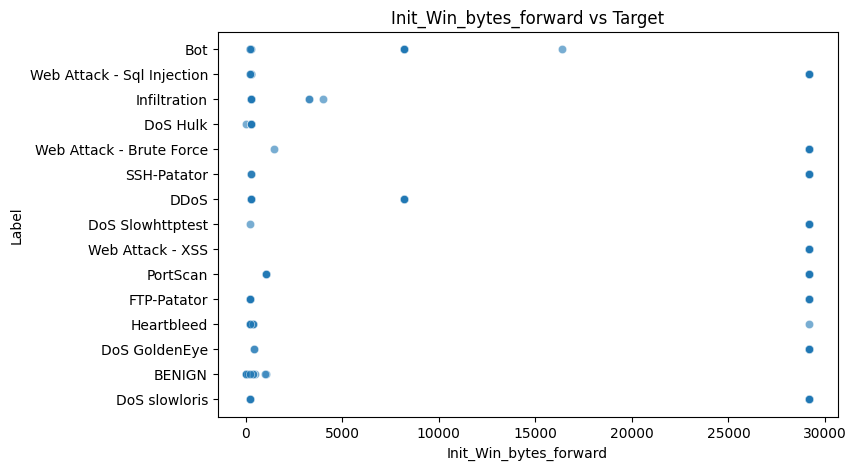

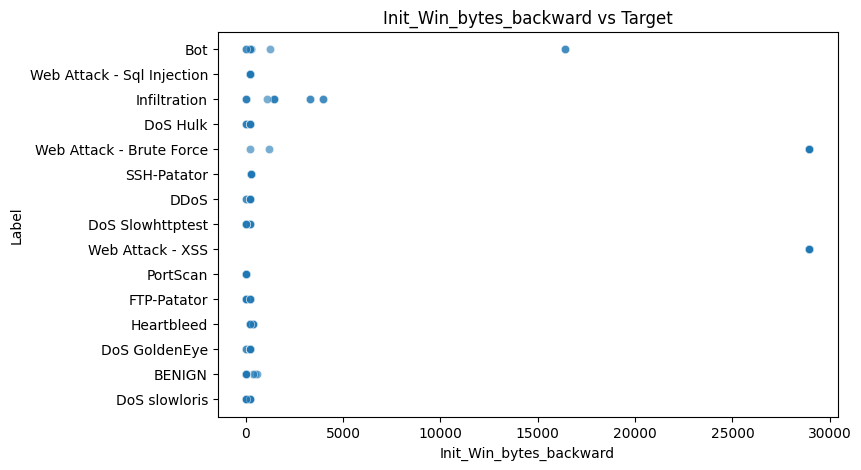

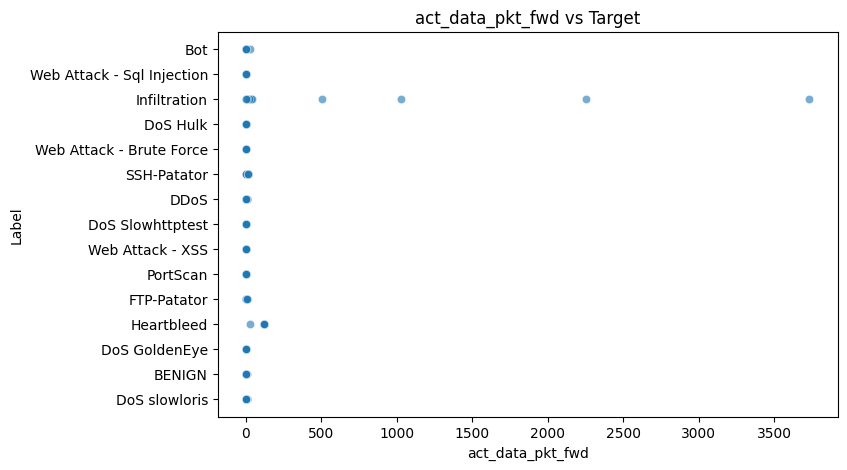

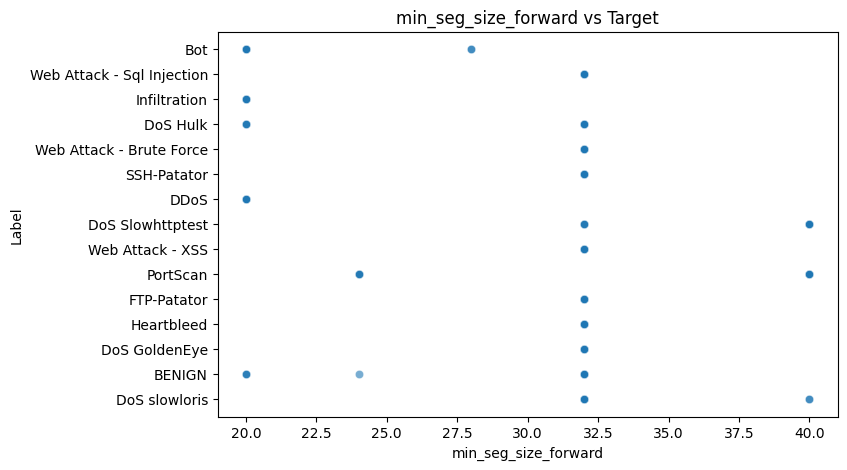

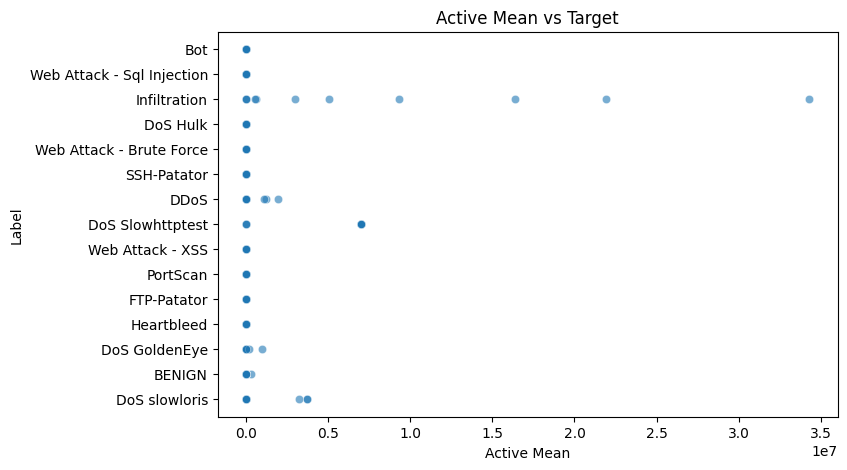

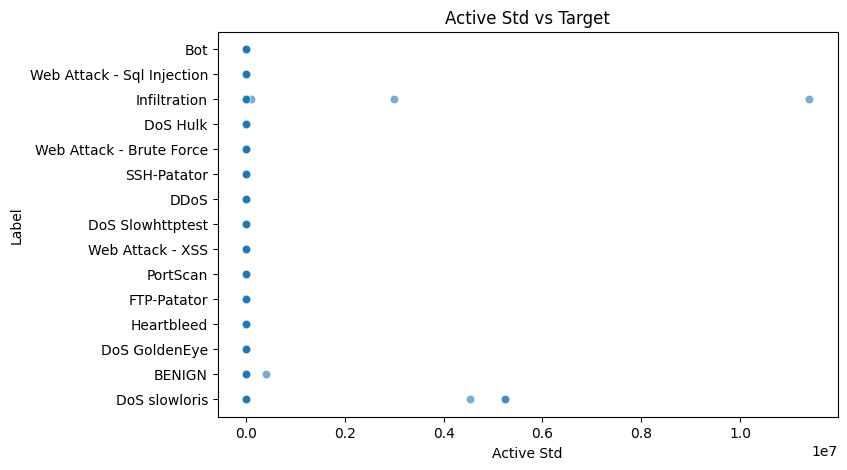

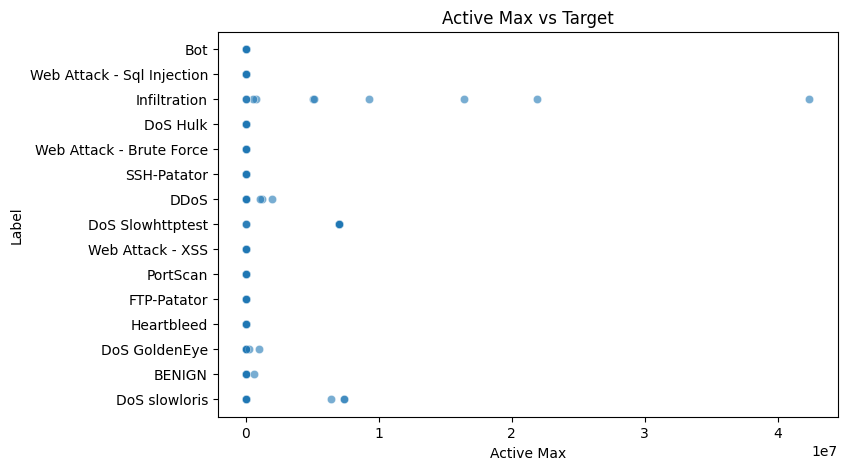

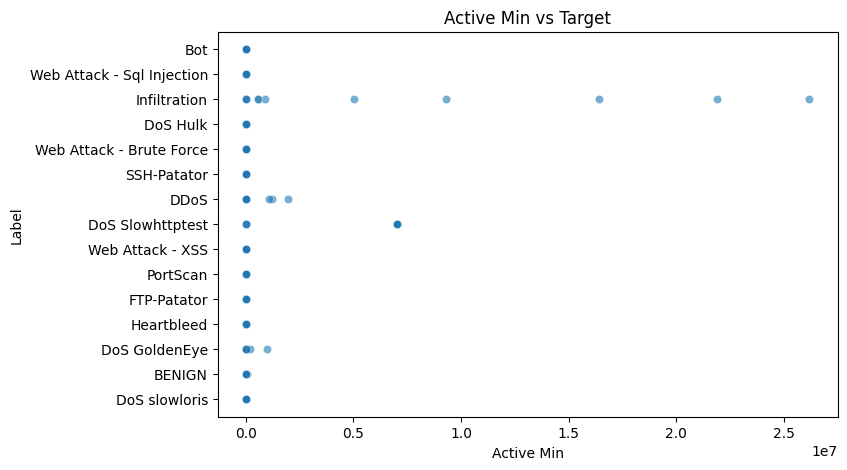

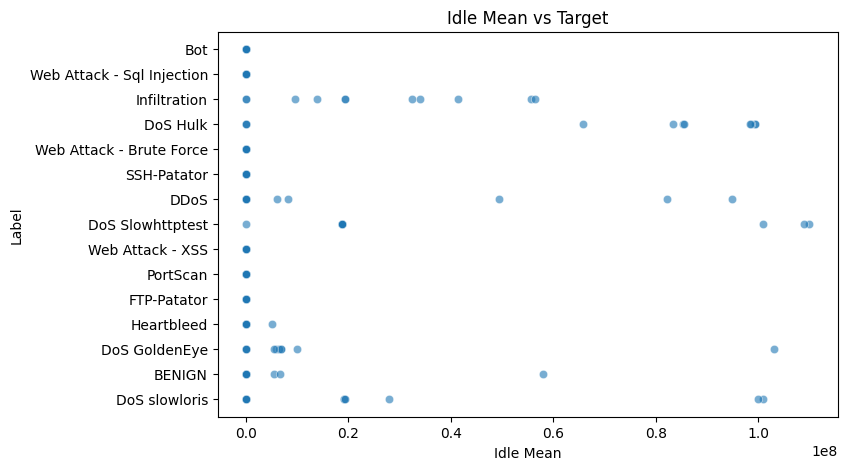

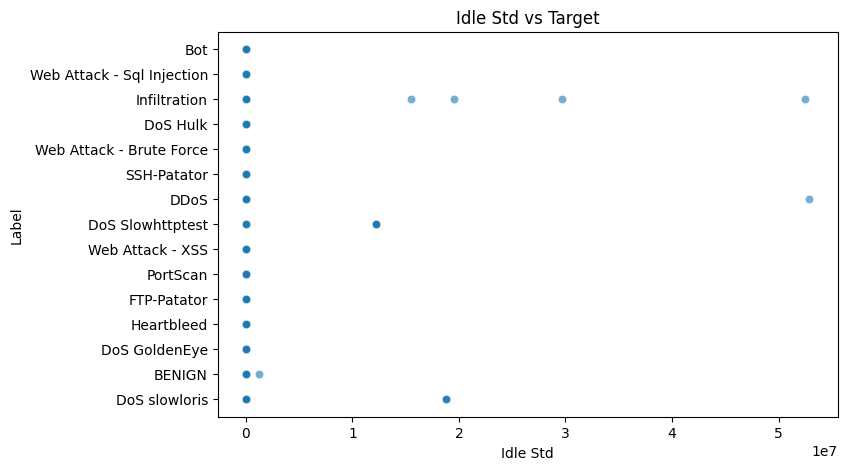

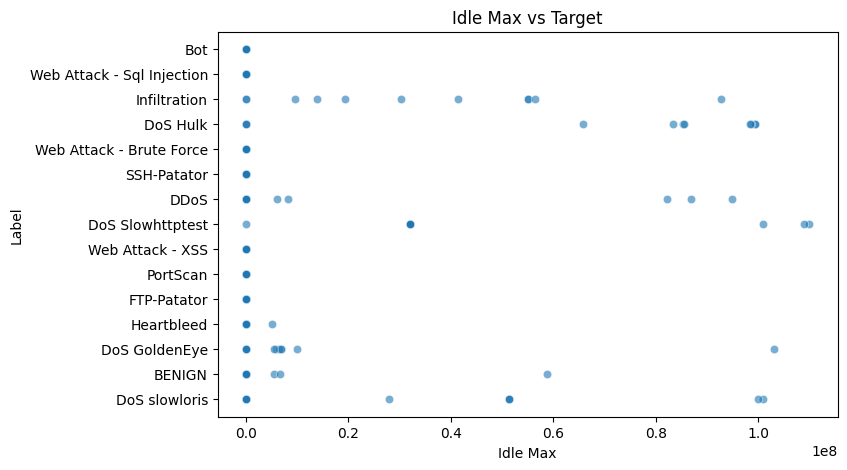

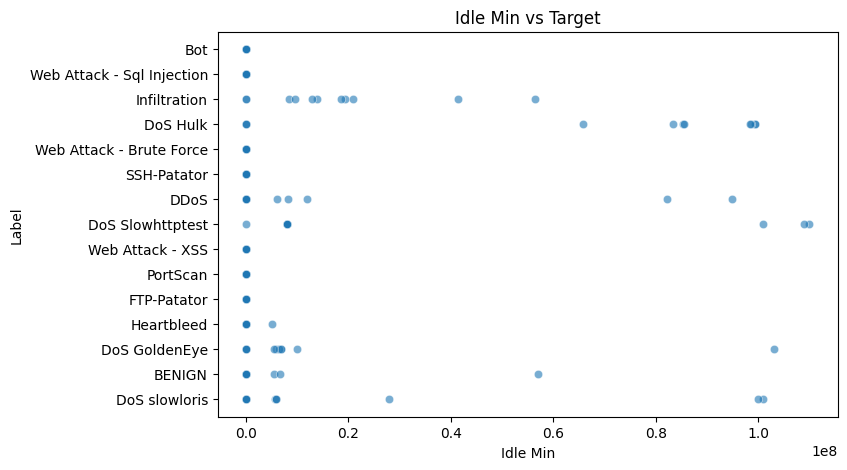

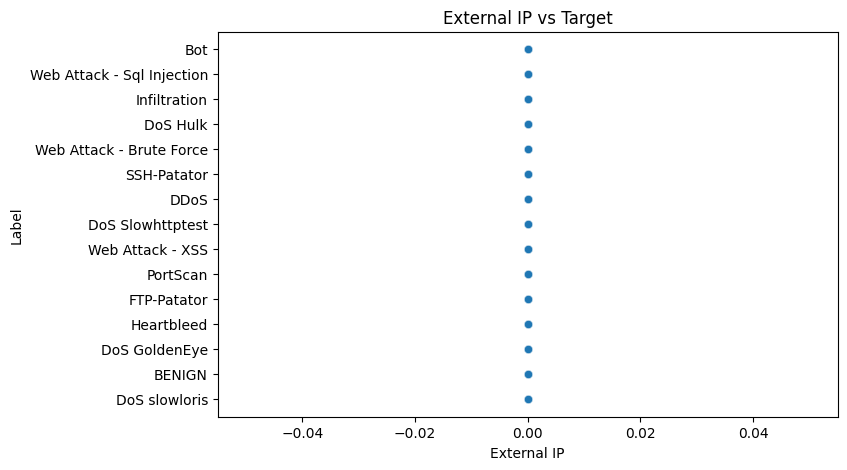

In [22]:
# 11. Feature Relationships with Target (if applicable)
if 'Label' in df.columns:
    print("\n===== Feature Relationships with Target =====")
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        if col != 'target_column':
            plt.figure(figsize=(8, 5))
            sns.scatterplot(data=df, x=col, y='Label', alpha=0.6)
            plt.title(f"{col} vs Target")
            plt.show()

In [19]:
# 12. Save Cleaned Dataset (optional)
df.to_csv('cleaned_dataset.csv', index=False)
print("\n===== Cleaned Dataset Saved =====")


===== Cleaned Dataset Saved =====
